# Classification

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data

The data shown here simulates a medical study in which mice infected with a virus were given various doses of two medicines and then checked 2 weeks later to see if they were still infected. Given this data, our goal is to create a classifcation model than predict (given two dosage measurements) if they mouse will still be infected with the virus.

You will notice the groups are very separable, this is on purpose, to explore how the various parameters of an SVM model behave.

In [6]:
df = pd.read_csv("DATA/mouse_viral_study.csv")

In [7]:
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


<AxesSubplot:>

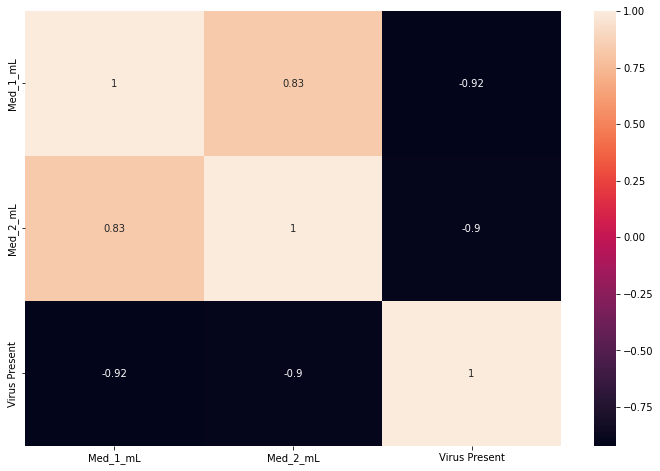

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr() , annot=True)

<AxesSubplot:xlabel='Med_1_mL', ylabel='Med_2_mL'>

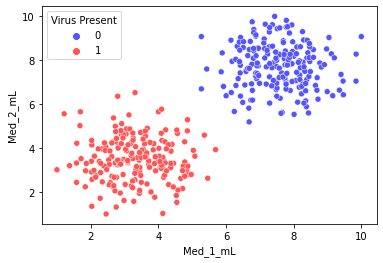

In [9]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',
                data=df,palette='seismic')

### We want to somehow automatically create a separating hyperplane ( a line in 2D)


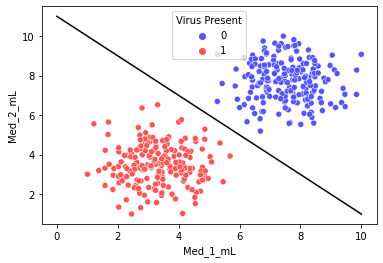

In [10]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',palette='seismic',data=df)


x = np.linspace(0,10,100)
m = -1
b = 11
y = m*x + b
plt.plot(x,y,'k')

In [11]:
from sklearn.svm import SVC

In [12]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 

In [13]:
y = df['Virus Present']
X = df.drop('Virus Present',axis=1) 

In [14]:
model = SVC(kernel='linear', C=1000)
model.fit(X, y)

SVC(C=1000, kernel='linear')

### The following code has been taken from Scikit Learn Documentation!

In [15]:
def plot_svm_boundary(model,X,y):
    
    X = X.values
    y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

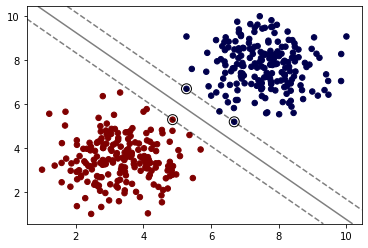

In [16]:
plot_svm_boundary(model,X,y)

In [17]:
model.support_vectors_[:, 0], model.support_vectors_[:, 1]  # all x co-ords and all y co-ords

(array([6.68307209, 5.27060321, 4.85999842]),
 array([5.19427732, 6.6968394 , 5.29248262]))

## Hyper Parameters

### C

Regularization parameter. The strength of the regularization is **inversely** proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

In [18]:
model = SVC(kernel='linear', C=0.05)
model.fit(X, y)

SVC(C=0.05, kernel='linear')

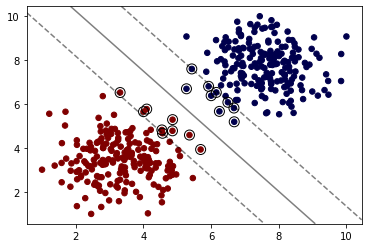

In [19]:
plot_svm_boundary(model,X,y)

### Kernel

[Choosing a Kernel](https://stats.stackexchange.com/questions/18030/how-to-select-kernel-for-svm?rq=1)

#### rbf - [Radial Basis Function](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)


When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

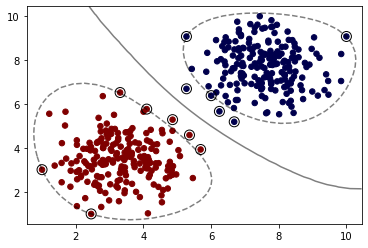

In [20]:
model = SVC(kernel='rbf', C=1)
model.fit(X, y)
plot_svm_boundary(model,X,y)

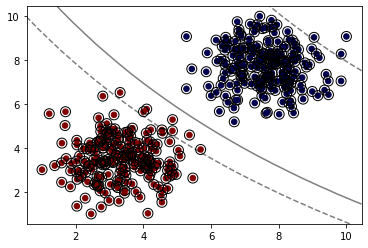

In [21]:
model = SVC(kernel='sigmoid')
model.fit(X, y)
plot_svm_boundary(model,X,y)

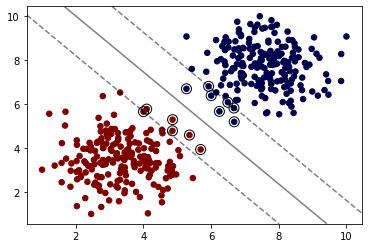

In [22]:
model = SVC(kernel='poly', C=1,degree=1)
model.fit(X, y)
plot_svm_boundary(model,X,y)

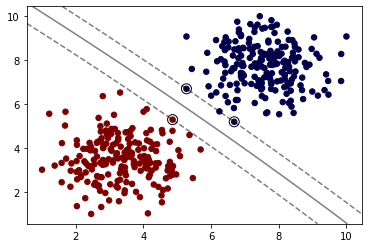

In [23]:
model = SVC(kernel='poly', C=1,degree=2)
model.fit(X, y)
plot_svm_boundary(model,X,y)

### gamma

gamma : {'scale', 'auto'} or float, default='scale'
    Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.

    - if ``gamma='scale'`` (default) is passed then it uses
      1 / (n_features * X.var()) as value of gamma,
    - if 'auto', uses 1 / n_features.

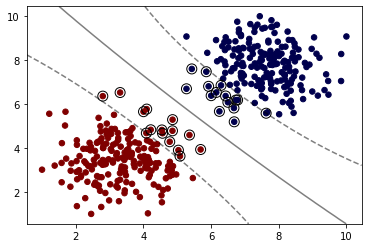

In [24]:
model = SVC(kernel='rbf', C=1,gamma=0.01)
model.fit(X, y)
plot_svm_boundary(model,X,y)

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)

In [27]:
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [32]:
grid.best_estimator_

SVC(C=0.01, kernel='linear')

# Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="imgs/Types_of_concrete_slump.jpg">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (7)(component kg in one M^3 concrete):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

Output variables (3):
* SLUMP (cm)
* FLOW (cm)
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

In [33]:
df = pd.read_csv('DATA/cement_slump.csv')

In [34]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [37]:
df.columns 

Index(['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr.',
       'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)',
       'Compressive Strength (28-day)(Mpa)'],
      dtype='object')

In [38]:
df.columns = ['Cement', 'Slag', 'Fly ash', 'Water', 'SP', 'Coarse Aggr',
       'Fine Aggr', 'SLUMP_cm', 'FLOW_cm',
       'Compressive Strength_28days_Mpa']

In [39]:
df.isna().sum()

Cement                             0
Slag                               0
Fly ash                            0
Water                              0
SP                                 0
Coarse Aggr                        0
Fine Aggr                          0
SLUMP_cm                           0
FLOW_cm                            0
Compressive Strength_28days_Mpa    0
dtype: int64

In [40]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr,Fine Aggr,SLUMP_cm,FLOW_cm,Compressive Strength_28days_Mpa
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


<AxesSubplot:>

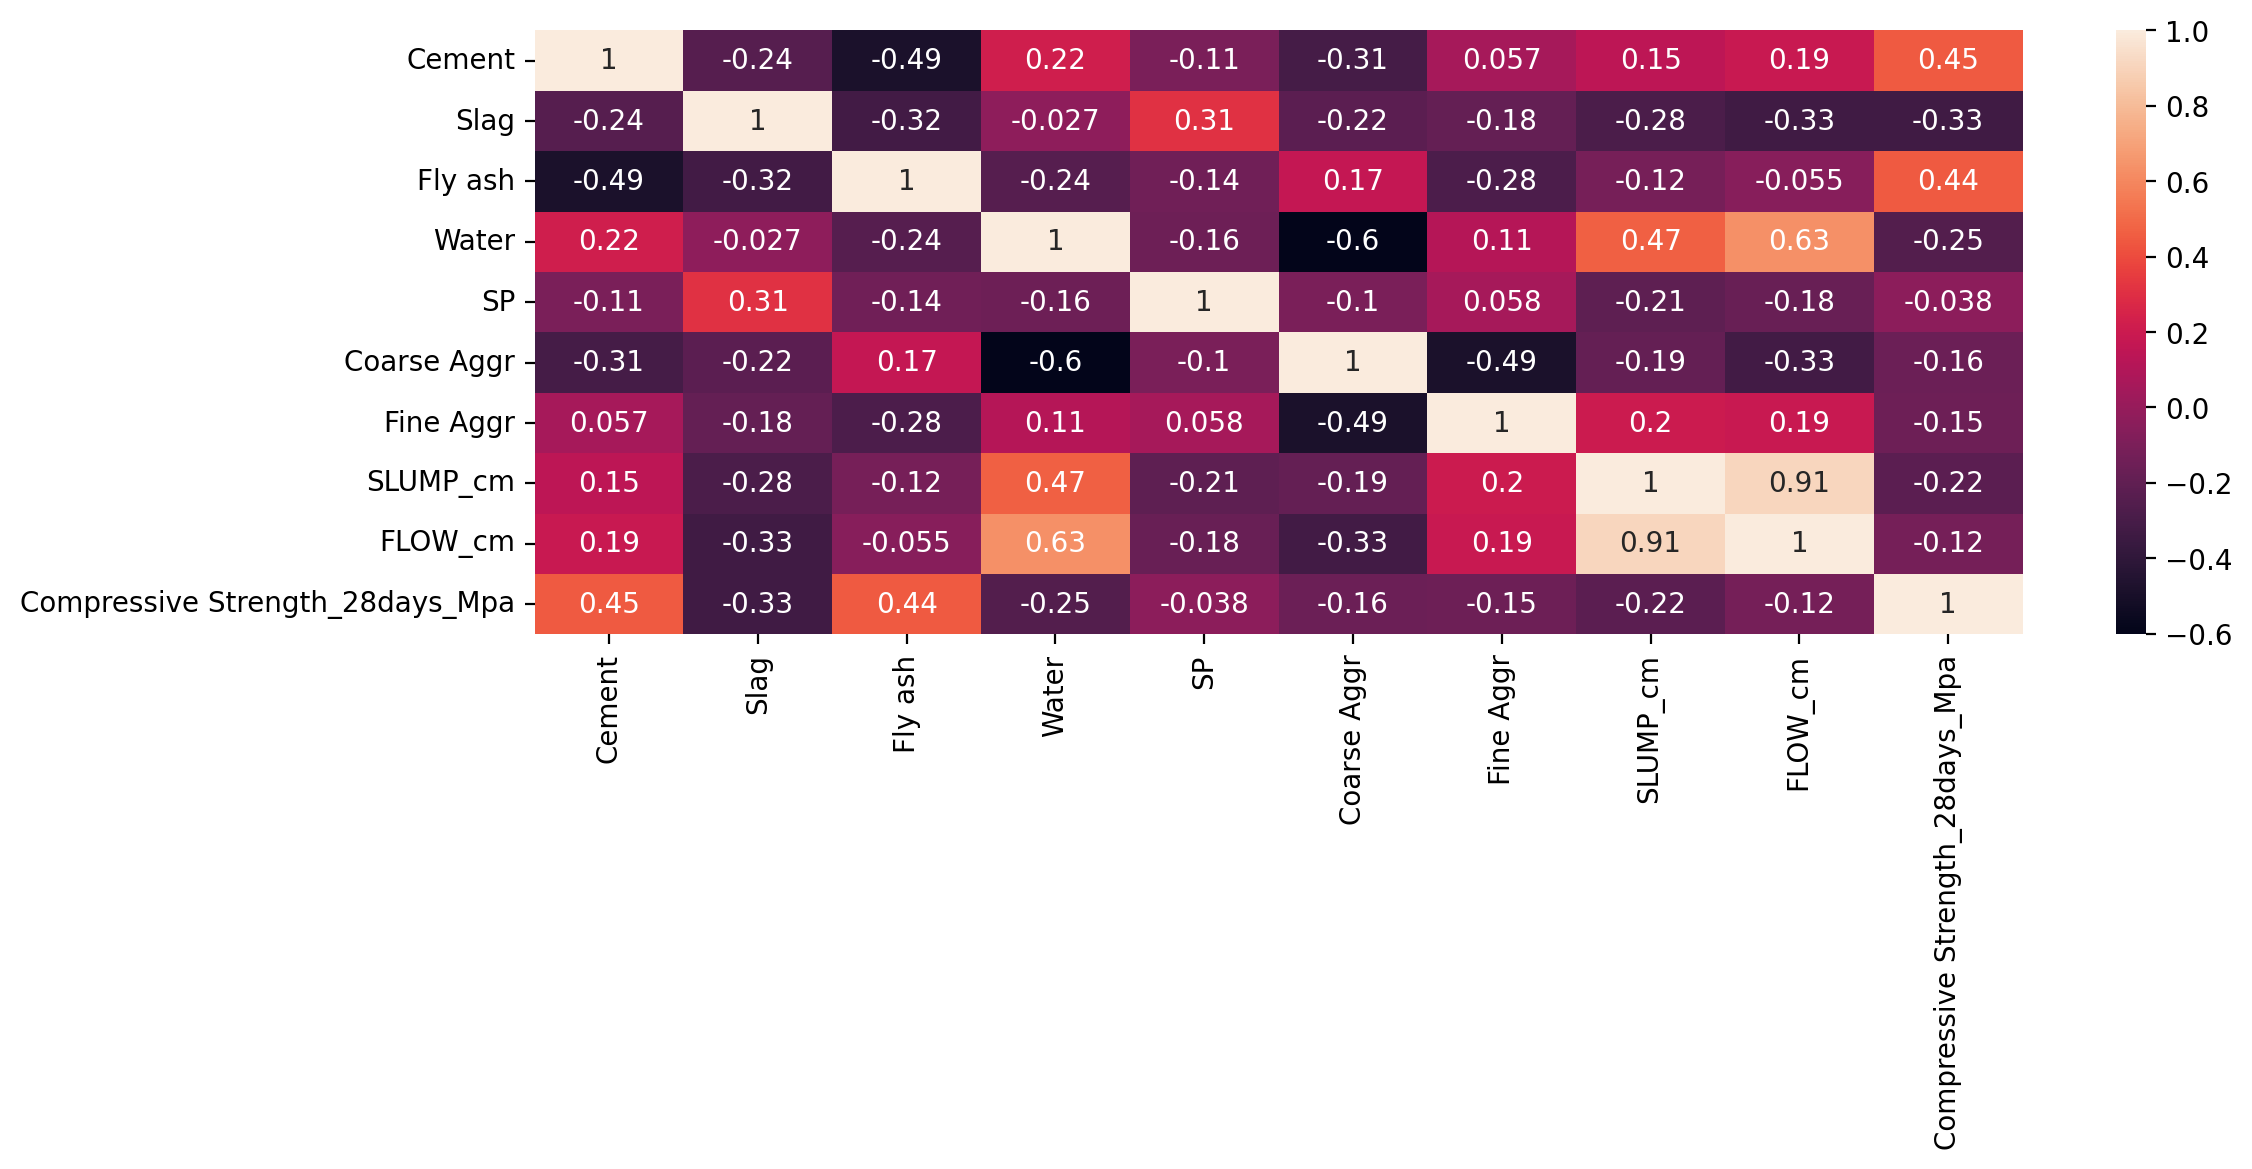

In [41]:
plt.figure(figsize=(12,4), dpi =200)
sns.heatmap(df.corr() , annot=True)

<Figure size 3200x2400 with 0 Axes>

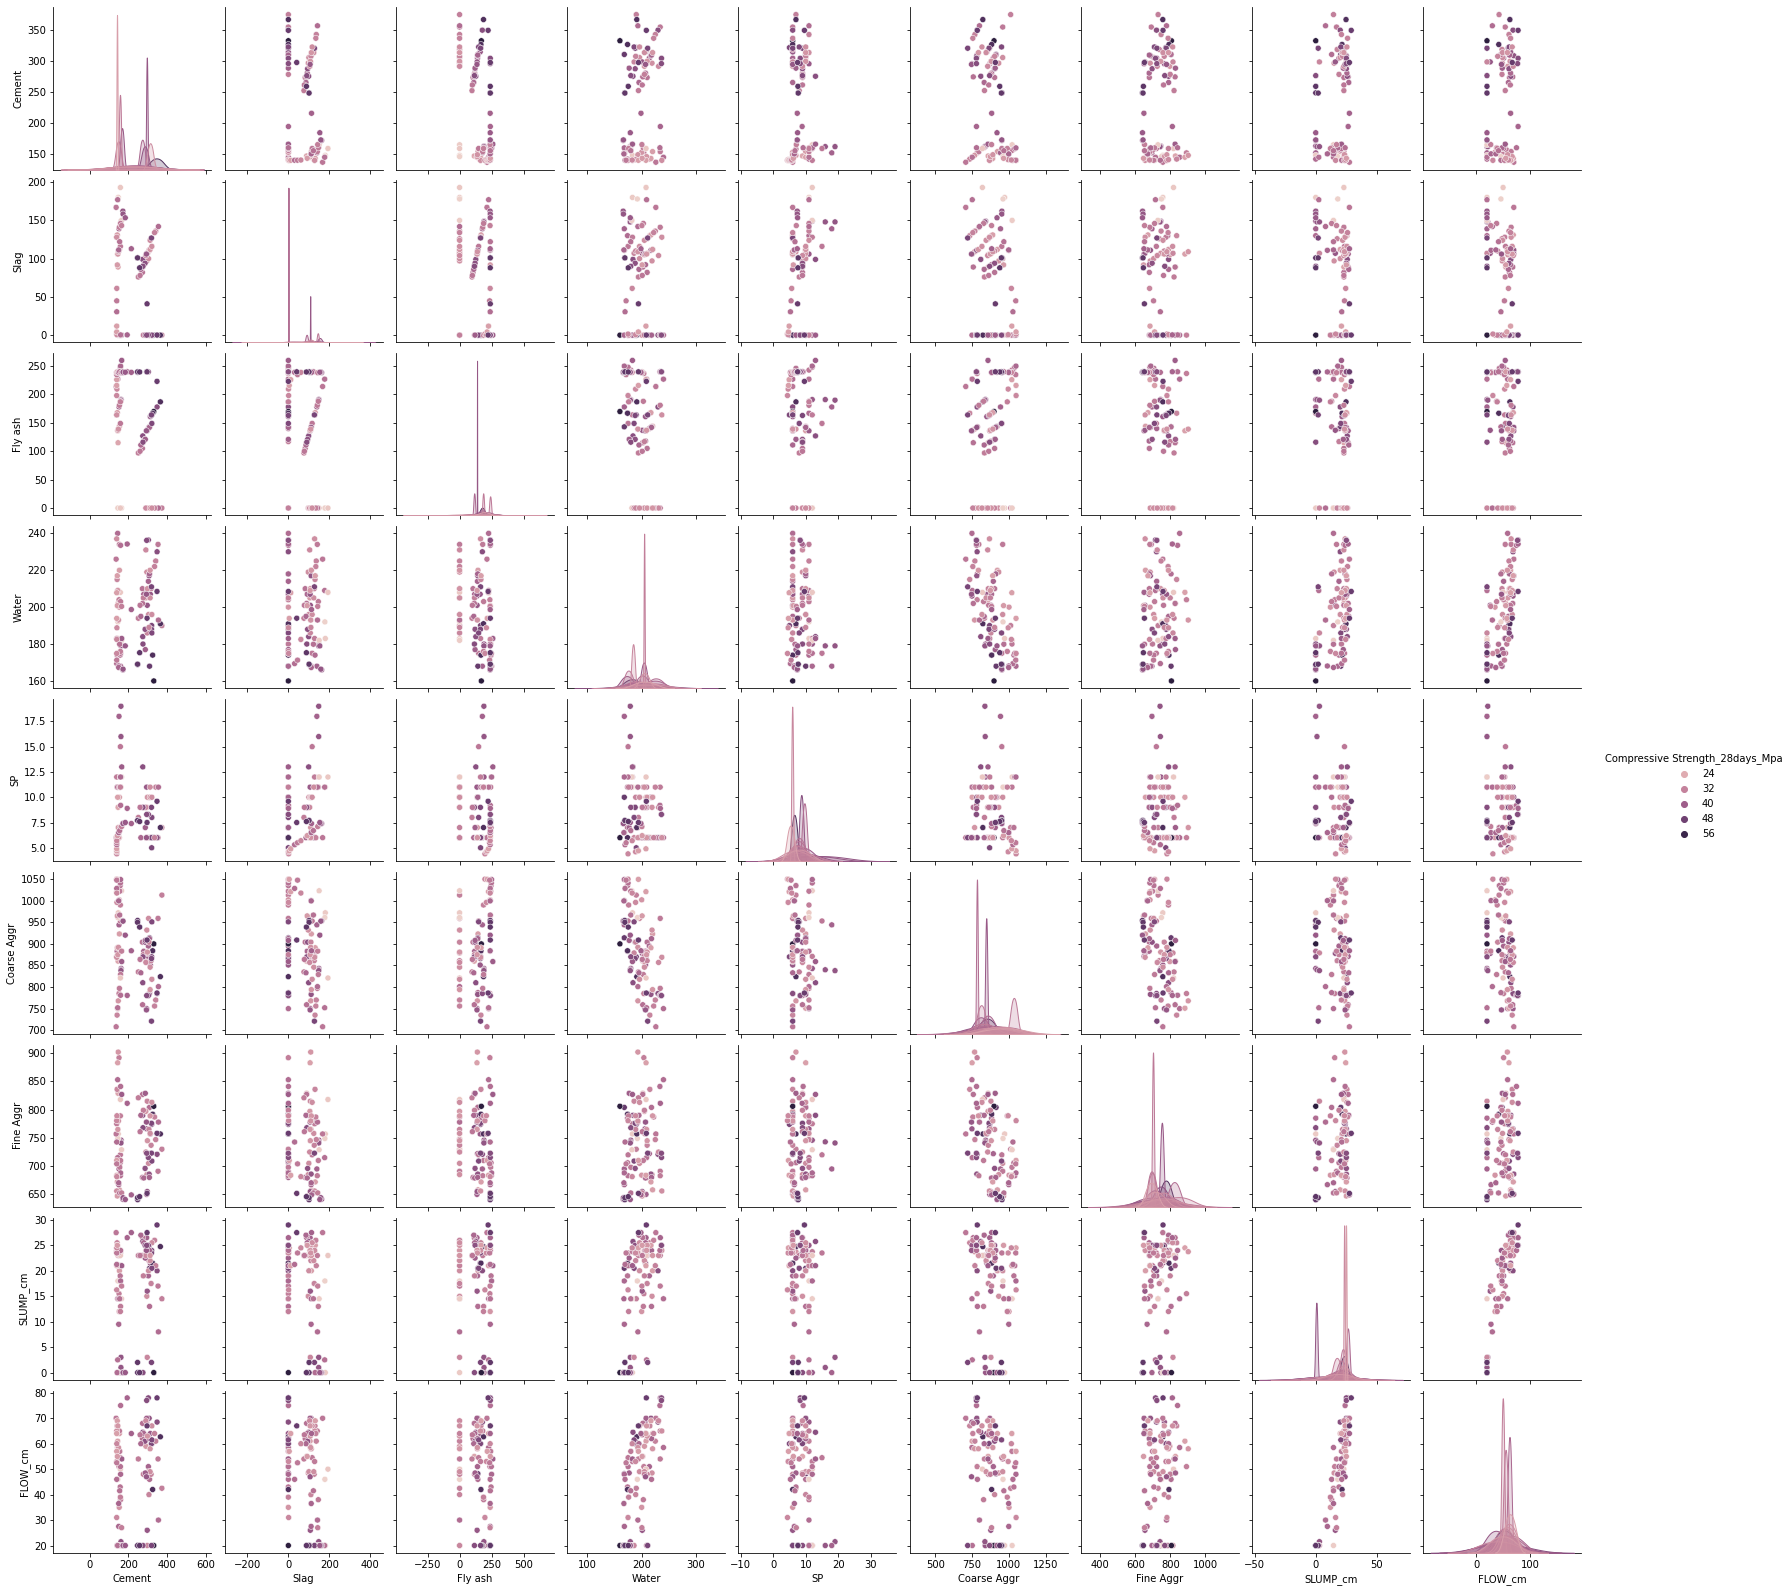

In [45]:
plt.figure(figsize=(16,12), dpi =200)
sns.pairplot(data=df, hue='Compressive Strength_28days_Mpa')

In [46]:
X = df.drop('Compressive Strength_28days_Mpa', axis=1)
y = df['Compressive Strength_28days_Mpa']

In [47]:
y

0      34.99
1      41.14
2      41.81
3      42.08
4      26.82
       ...  
98     49.97
99     50.23
100    50.50
101    49.17
102    48.70
Name: Compressive Strength_28days_Mpa, Length: 103, dtype: float64

In [48]:
X

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr,Fine Aggr,SLUMP_cm,FLOW_cm
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0
...,...,...,...,...,...,...,...,...,...
98,248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.0,20.0
99,248.0,101.0,239.9,169.1,7.7,949.9,644.1,2.0,20.0
100,258.8,88.0,239.6,175.3,7.6,938.9,646.0,0.0,20.0
101,297.1,40.9,239.9,194.0,7.5,908.9,651.8,27.5,67.0


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101 )

In [51]:
X_train.shape

(82, 9)

In [52]:
y_train.shape

(82,)

In [53]:
X_test.shape

(21, 9)

In [54]:
from sklearn.svm import SVR,LinearSVR

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [57]:
help(SVR)

Help on class SVR in module sklearn.svm._classes:

class SVR(sklearn.base.RegressorMixin, sklearn.svm._base.BaseLibSVM)
 |  SVR(*, kernel='rbf', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0, epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=-1)
 |  
 |  Epsilon-Support Vector Regression.
 |  
 |  The free parameters in the model are C and epsilon.
 |  
 |  The implementation is based on libsvm. The fit time complexity
 |  is more than quadratic with the number of samples which makes it hard
 |  to scale to datasets with more than a couple of 10000 samples. For large
 |  datasets consider using :class:`~sklearn.svm.LinearSVR` or
 |  :class:`~sklearn.linear_model.SGDRegressor` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  Read more in the :ref:`User Guide <svm_regression>`.
 |  
 |  Parameters
 |  ----------
 |  kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, default='rbf'
 |       Specifies th

In [58]:
from sklearn.model_selection import GridSearchCV

In [79]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

In [80]:
svr = SVR()
grid = GridSearchCV(svr,param_grid=param_grid)

In [78]:
X_train.shape

(82, 9)

In [81]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [83]:
grid.best_estimator_

SVR(C=1, degree=2, epsilon=2, kernel='linear')

In [82]:
from sklearn.metrics import mean_squared_error

In [84]:
mean_squared_error(y_test,grid.predict(X_test))

9.169605355039353

In [85]:
y_test.values[0]

18.26

In [86]:
X_test.shape

(21, 9)

In [92]:
np.round(grid.predict(X_test),2)

array([20.2 , 39.05, 32.34, 29.87, 46.7 , 38.79, 33.35, 40.54, 37.66,
       50.52, 38.22, 31.27, 28.62, 35.58, 45.07, 47.05, 45.95, 36.32,
       31.14, 34.48, 43.14])

In [91]:
y_test.values

array([18.26, 41.14, 31.9 , 26.42, 44.48, 39.93, 30.97, 38.59, 37.92,
       52.65, 38.86, 28.16, 27.62, 28.29, 45.69, 43.95, 44.08, 32.44,
       33.38, 32.04, 36.19])